In [600]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.metrics import average_precision_score

from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import fbeta_score, make_scorer

# **Predicting Travel Insurance Claims:** A Machine Learning Approach to Modeling and Risk Assessment

> Pendahuluan

### Apa itu Asuransi Perjalanan?

Asuransi perjalanan adalah bentuk perlindungan penting yang dirancang untuk melindungi para pelancong dari berbagai risiko yang mungkin terjadi selama perjalanan mereka. Asuransi ini biasanya mencakup berbagai kejadian tak terduga seperti pembatalan perjalanan, kehilangan bagasi, atau bahkan perawatan medis darurat di luar negeri. Dengan memiliki asuransi perjalanan, pelancong dapat merasa lebih tenang dan terlindungi, mengetahui bahwa mereka memiliki dukungan finansial jika terjadi sesuatu yang tidak diinginkan. Selain itu, asuransi perjalanan juga dapat memberikan bantuan darurat seperti evakuasi medis dan dukungan hukum jika diperlukan, menjadikannya investasi yang bijak untuk memastikan pengalaman perjalanan yang lebih aman dan nyaman.

### Permasalahan

Risiko yang harus diperhitungkan oleh setiap perusahaan asuransi adalah risiko klaim dari nasabah. Klaim asuransi terjadi ketika seorang pemegang polis mengalami kerugian atau kejadian yang dicakup oleh polis asuransi mereka dan meminta perusahaan asuransi untuk memberikan kompensasi sesuai dengan ketentuan yang tercantum dalam polis.

Dalam asuransi perjalanan, kerugian yang dicover biasanya meliputi biaya medis darurat, yang mencakup perawatan rumah sakit dan obat-obatan jika pelancong jatuh sakit atau terluka. Selain itu, asuransi ini juga mencakup kompensasi untuk pembatalan perjalanan yang disebabkan oleh alasan yang dijamin, seperti sakit mendadak atau kejadian darurat. Kerugian lainnya yang dicover termasuk kehilangan atau kerusakan bagasi, keterlambatan perjalanan yang mengakibatkan biaya tambahan, serta evakuasi medis darurat jika diperlukan. Beberapa polis juga menyediakan perlindungan untuk kehilangan dokumen penting, seperti paspor, yang sangat penting untuk memastikan perjalanan tetap lancar dan aman.

Perusahaan asuransi dapat mengalami kerugian apabila tidak memitigasi risiko klaim dengan baik. Kerugian terjadi ketika pengeluaran perusahaan akibat klaim lebih besar dari pendapatan dari biaya polis asuransi yang diterima. Oleh karena itu penting bagi sebuah perusahaan untuk memitigasi risiko klaim, dan perusahaan juga dapat menentukan harga polis berdasarkan 

Oleh karena itu untuk memitigasi risiko klaim pada asuransi perjalanan dibuatlah pemodelan dengan pendekatan *machine learning*

### Data Understanding

Data yang terdapat didalam dataset ini meliputi: 

|Nama Kolom|Penjelasan|
|----|-----|
|Agency|Nama agen asuransi|
|Agency Type|Tipe agen asuransi (Airlines / Travel Agency)|
|Distribution Channel|Cara agen asuransi memasarkan asuransi (Online / Offline)|
|Product Name|Nama dari produk asuransi|
|Gender|Jender dari pihak tertanggung|
|Duration|Durasi perjalanan dari pihak tertanggung|
|Destination|Destinasi perjalanan dari pihak tertanggung|
|Net Sales|Jumlah penjualan polis asuransi perjalanan|
|Commission (in value)|komisi yang diterima oleh agen asuransi|
|Age|Usia dari pihak tertanggung|
|Claim|Status klaim|


### Data Cleaning

Dalam proses data cleaning data duplikat akan dihilangkan agar model tidak terlalu mempelajari data duplikat, missing value diisi sehingga dapat dimodelkan, dan data tidak wajar diperbaiki.

**Dataset**

In [601]:
df=pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


> Data Duplikat

**Jumlah Duplikat**

In [602]:
print(f'''
Banyaknya data duplikat: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.3f}%)''')


Banyaknya data duplikat: 4667 (10.528%)


Terdapat 4.667 atau sebesar 10,528% data duplikat yang akan dihapus.

**Menghapus Duplikat**

In [603]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

> Missing Values

**Jumlah Missing Values**

In [604]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  27667
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

Terdapat 27.667 data missing values pada kolom Gender. Hal ini mungkin dikarenakan pihak tertanggung lebih dari satu orang atau grup, maka nilai missing value pada label gender diisi dengan label "Unknown".

**Mengisi Missing Values**

In [605]:
df['Gender'].fillna('Unknown',inplace=True)
df.isna().sum()

C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\3763785946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown',inplace=True)


Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

> Data tidak wajar

In [606]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


Terdapat durasi yang nilainya -1, durasi dengan nilai dibawah 0 diubah menjadi 1.

**Mengubah Data Tidak Wajar**

In [607]:
df['Duration']=df['Duration'].apply(lambda x: x if x>0 else 1)

In [608]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.398855,42.342794,10.442622,39.930284
std,113.542351,50.025244,20.355921,13.526346
min,1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


### EDA

**Proporsi Klaim dan Tidak Klaim**

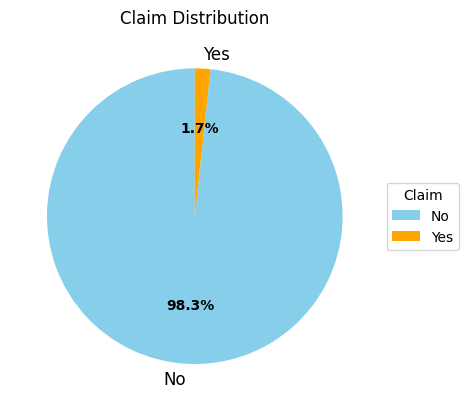

In [609]:
claim_counts = df['Claim'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    claim_counts,
    labels=claim_counts.index,
    autopct='%1.1f%%',  # Display percentage labels
    startangle=90,     # Start the pie chart from the top
    colors=['skyblue', 'orange']  # Customize colors if desired
)

# Add a legend
ax.legend(wedges, claim_counts.index,
          title="Claim",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Improve font size of percentage labels and legend
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)
ax.set_title("Claim Distribution")

# Show the plot
plt.show()

Berdasarkan klaimnya terdapat 98,3% dari polis asuransi yang tidak klaim, sedangkan 1,7% sisanya klaim. Hal ini berarti data unbalance yang artinya pada modeling kita harus menggunakan resampler agar jumlah klaim dan tidak klaim menjadi sama.

> Kolom Numerikal

In [634]:
numerical = [var for var in df.columns if (df[var].dtypes not in ['object'])]

**Uji Normalitas**

In [611]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Duration,94651.338688,0.0,Not Normally Distributed
1,Net Sales,28423.003003,0.0,Not Normally Distributed
2,Commision (in value),33063.258012,0.0,Not Normally Distributed
3,Age,23715.891054,0.0,Not Normally Distributed


Didapatkan bahwa nilai dari durasi perjalanan, Net Sales, Komisi, dan Usia memiliki nilai yang tidak terdistibusi normal, berdasarkan uji normalitas The D'Agostino-Pearson.

In [612]:
def plot_histogram_boxplot(df, column_name):
    """
    Plots a histogram and a box plot side by side for a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    
    # Plot histogram
    sns.histplot(df[column_name], bins=30, ax=axes[0], kde=False)
    axes[0].set_title(f'Histogram of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    
    # Plot box plot
    sns.boxplot(x=df[column_name], ax=axes[1])
    axes[1].set_title(f'Box Plot of {column_name}')
    axes[1].set_xlabel(column_name)

    # Adjust layout
    plt.tight_layout()
    plt.show()

**Distribusi Durasi**

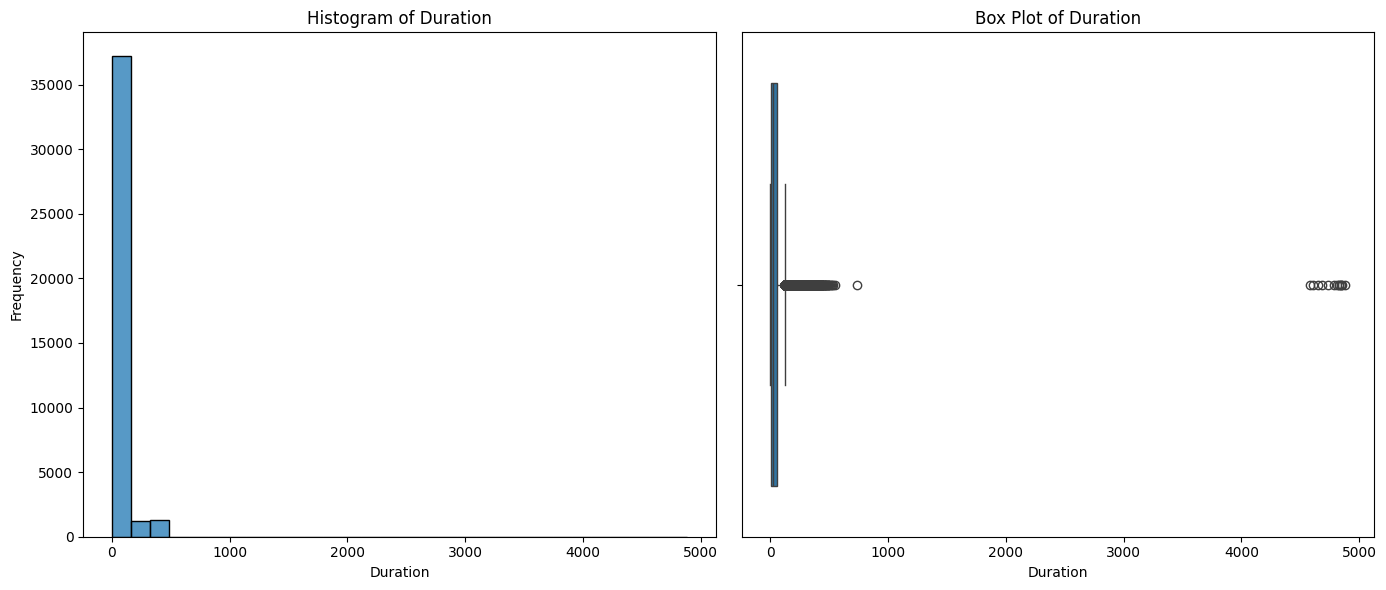

In [613]:
plot_histogram_boxplot(df,'Duration')

Dapat diliihat bahwa kebanyakan pihak tertanggung memiliki durasi kurang dari 50 hari, namun terdapat banyak outlier yang memiliki durasi yang sangat tinggi hingga lebih dari 4500 hari.

**Distribusi Jumlah Penjualan Polis**

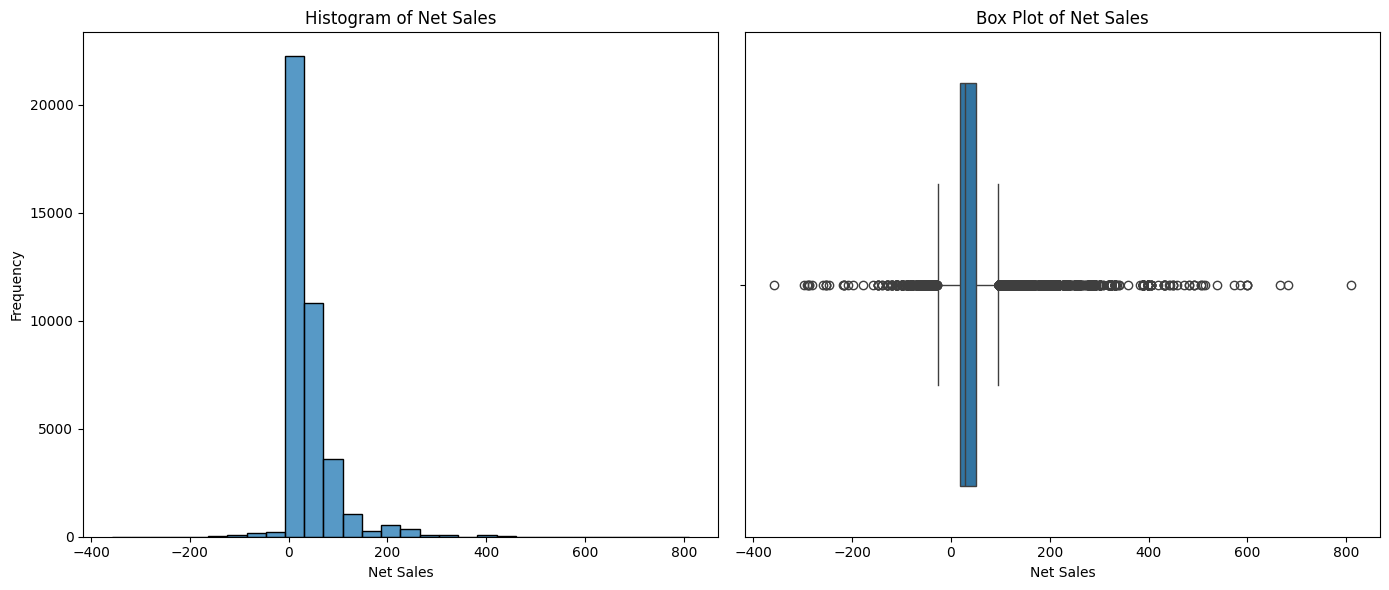

In [635]:
plot_histogram_boxplot(df,'Net Sales')

Dapat dilihat bahwa kebanyakan besarnya net sales adalah direntang 1 hingga 100, dengan banyak outlier baik di atas batas atas maupun dibawah batas bawah.

**Distribusi Komisi Agen Asuransi**

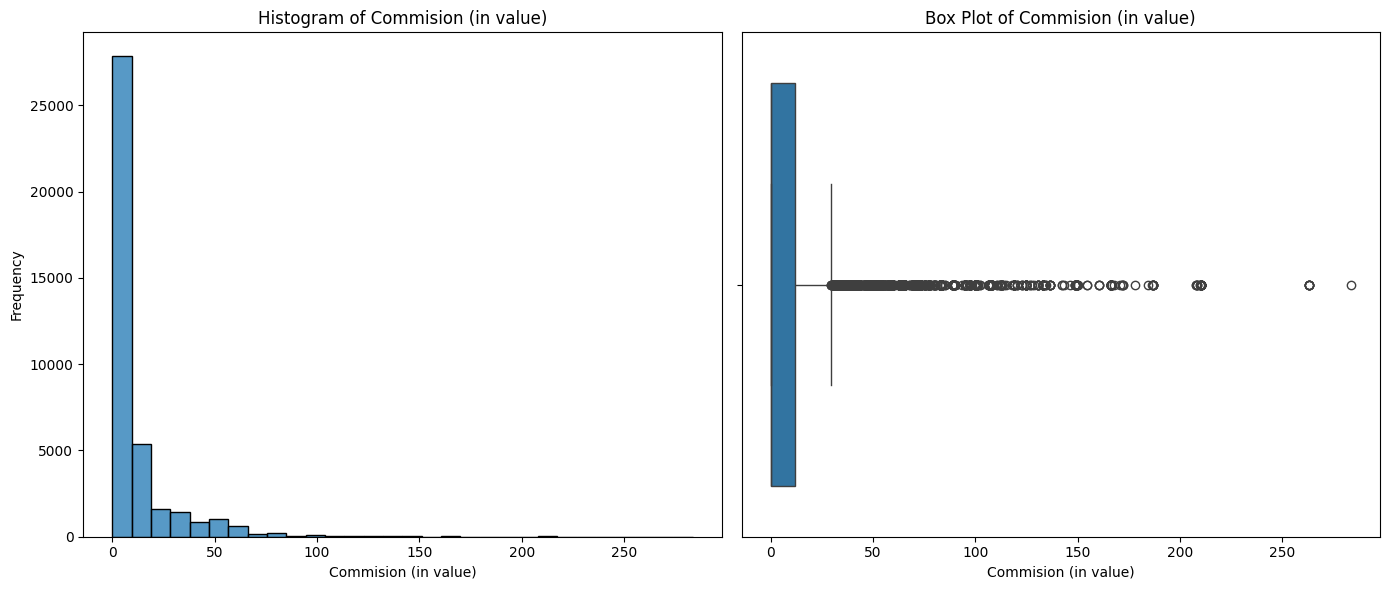

In [639]:
plot_histogram_boxplot(df,'Commision (in value)')

Dapat dilihat bahwa nilai komisi mayoritas dibawah dari 10, dengan outlier yang tinggin hingga mencapai lebih dari 250.

> Kolom Kategorical

In [615]:
categorical = [var for var in df.drop(columns='Claim').columns if df[var].dtypes in ['object']]

**Proporsi Kolom Kategorikal**

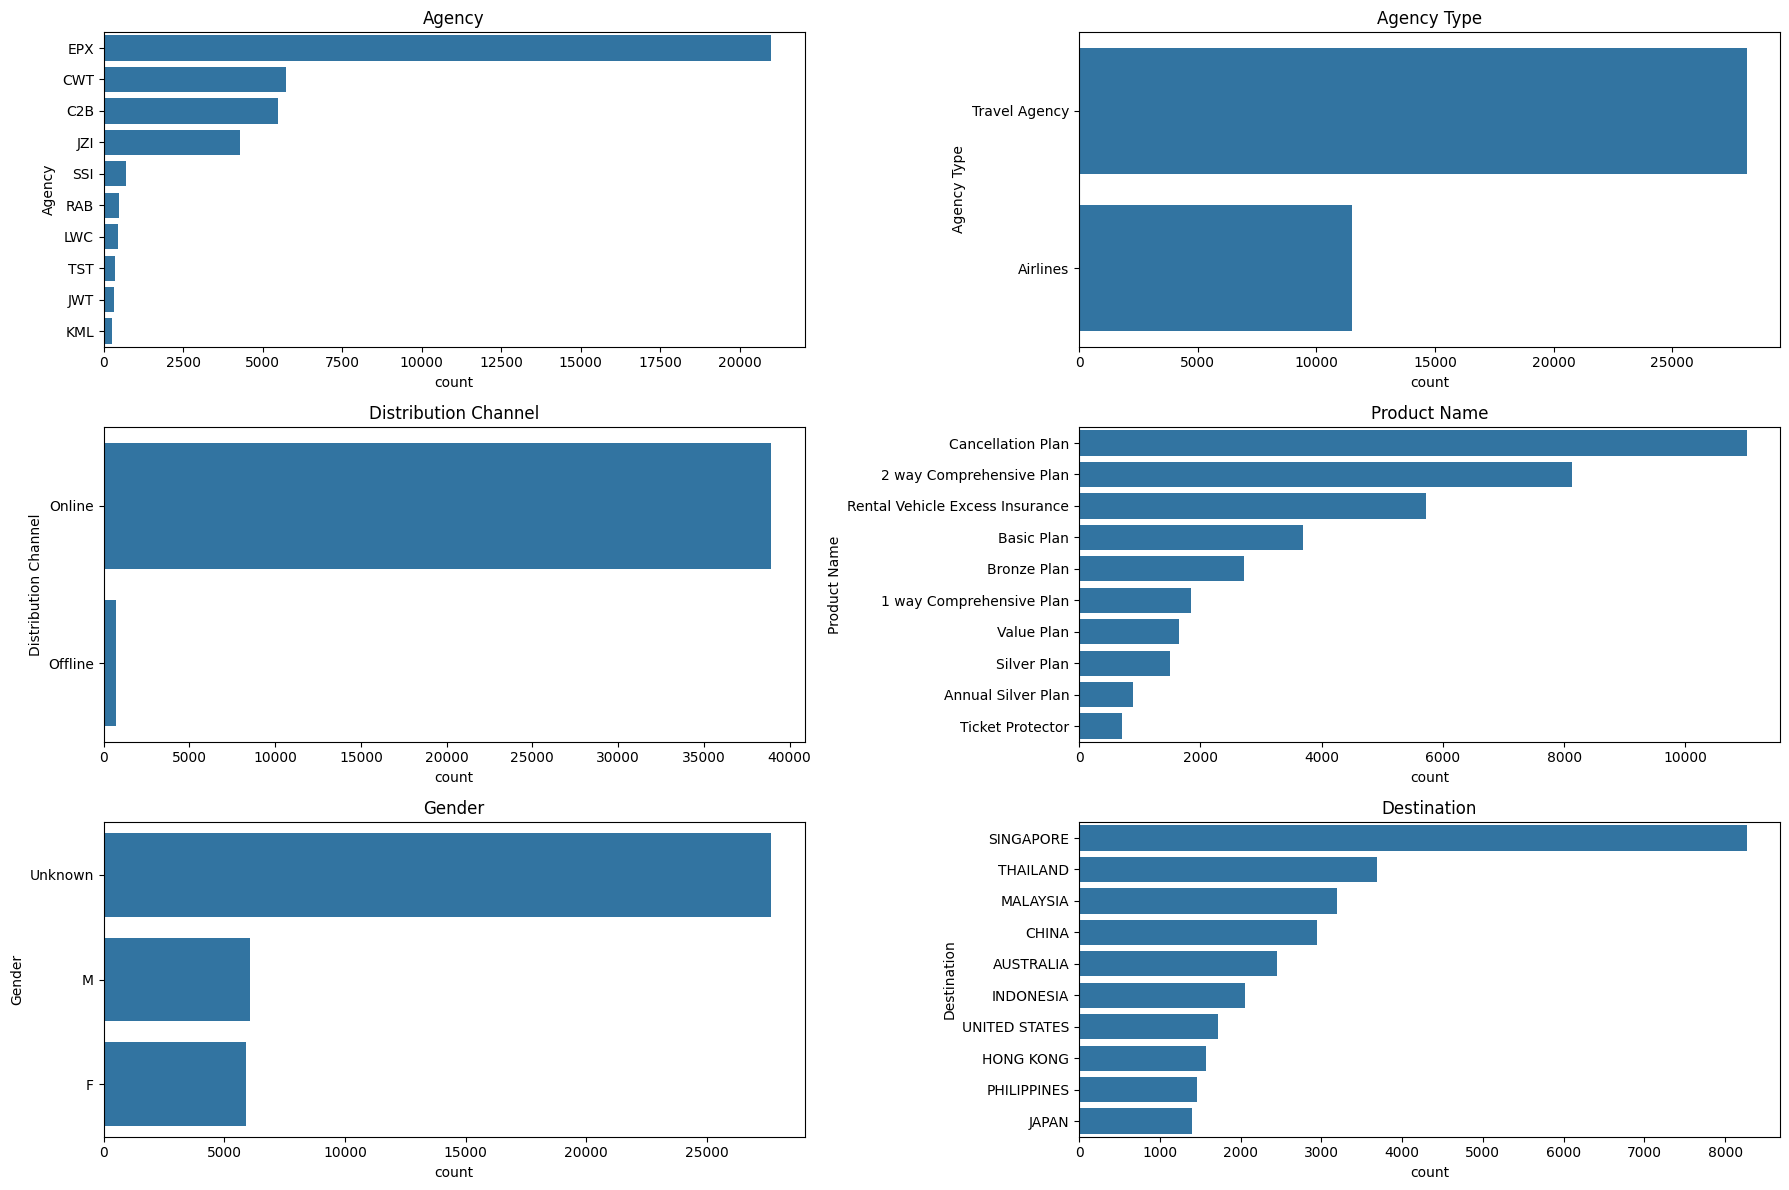

In [616]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    top_categories = df[i].value_counts().head(10).index
    df_top10 = df[df[i].isin(top_categories)]
    ax = sns.countplot(data=df_top10, y= i, ax= j, order=df_top10[i].value_counts().index)
    ax.set_title(f'{i}', size = 12) 

plt.tight_layout()
plt.show()

Dapat dilihat bahwa:
1. Agency terbanyak dalah agency APX, dilanjutkan dengan CWT dan C2B.
2. Mayoritas polis asuransi berasal dari tipe agency travel agency, dan sisanya berasal dari tipe agensi airlines/maskapai penerbangan.
3. Mayoritas polis asuransi dipesan secara online.
4. Jenis polis terbanyak adalah Cancellation Plan
5. Mayoritas gender dari pihak tertanggun tidak diketahui.
6. Destinasi pihak tertanggun terbanyak adlah singpura, diikuti oleh thailand dan malaysia.


In [617]:
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'Claim']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Yes']+agg_table['No']
    agg_table['% Exited'] = (agg_table['Yes']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% Exited', ascending=False).head(20)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Exited', ax=axes[0])
    label = ['{:.2f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Exited passengers by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='Claim', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of customer by {col} and churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

**Proporsi Klaim berdasarkan Agensi**

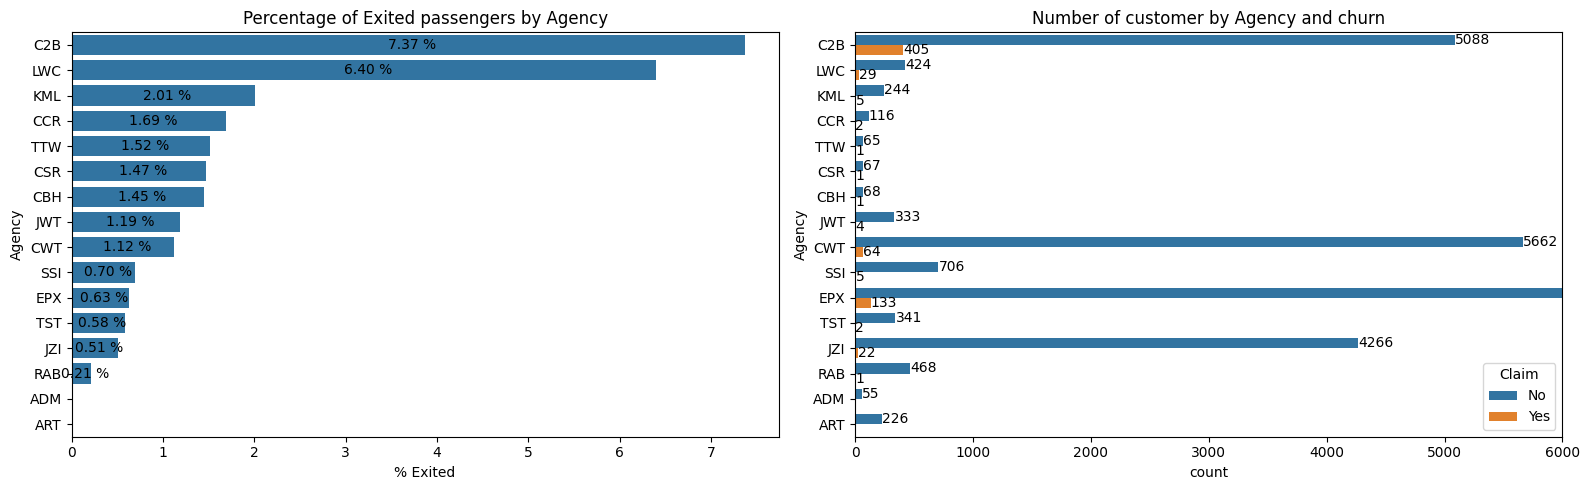

In [618]:
create_plot(df, 'Agency', x_maks=6000)

Didapatkan bahwa agency yang mengluarkan polis dengan persetasi klaim tertinggi adalah CB2 yaitu sebesar 7,37% diikuti LWC dan KML.

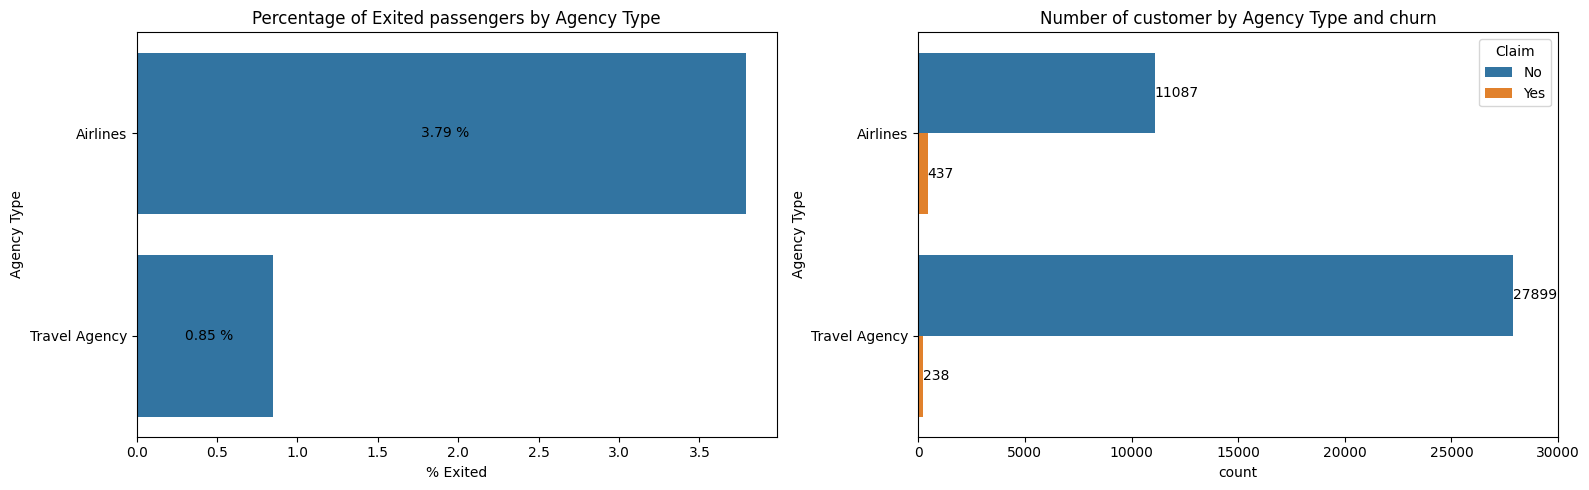

In [619]:
create_plot(df, 'Agency Type', x_maks=30000)

Didapatkan berdasarkan tipe agensi, Airline atau maskapai penerbanyan lebih tiggi yaitu sebesar 3.79% dibandingkan dengan agensi perjalanan.

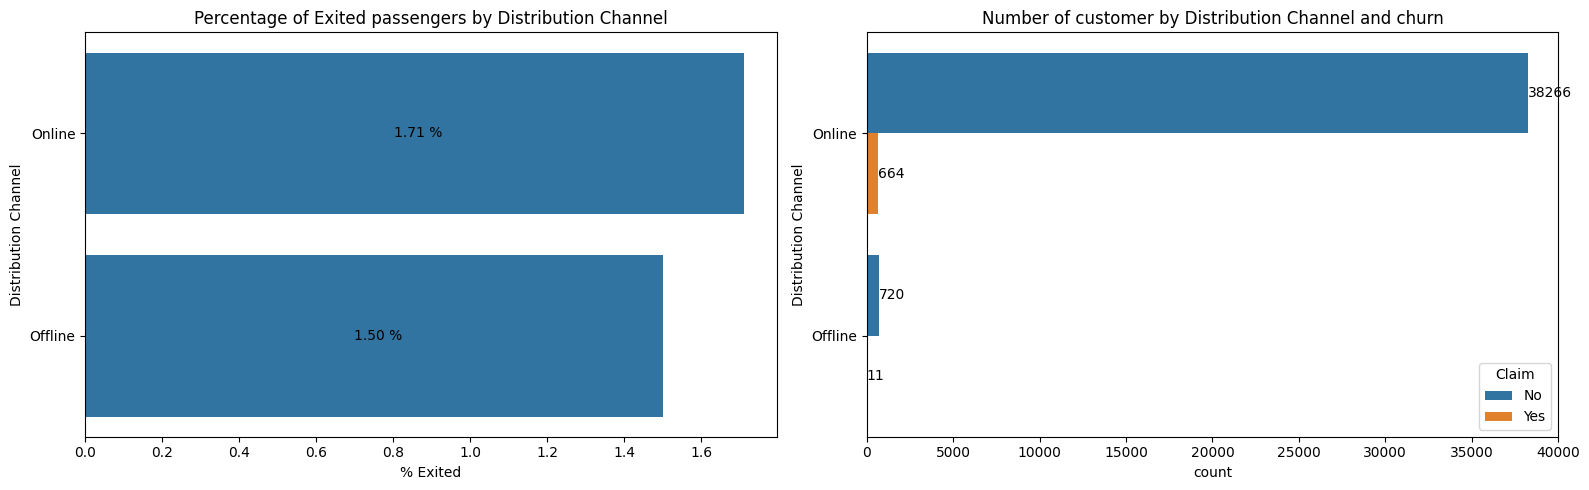

In [620]:
create_plot(df, 'Distribution Channel', x_maks=40000)

Didapatkan bahwa jenis pemesanan online memiliki persentase klaim yang lebih tinggi dari offline.

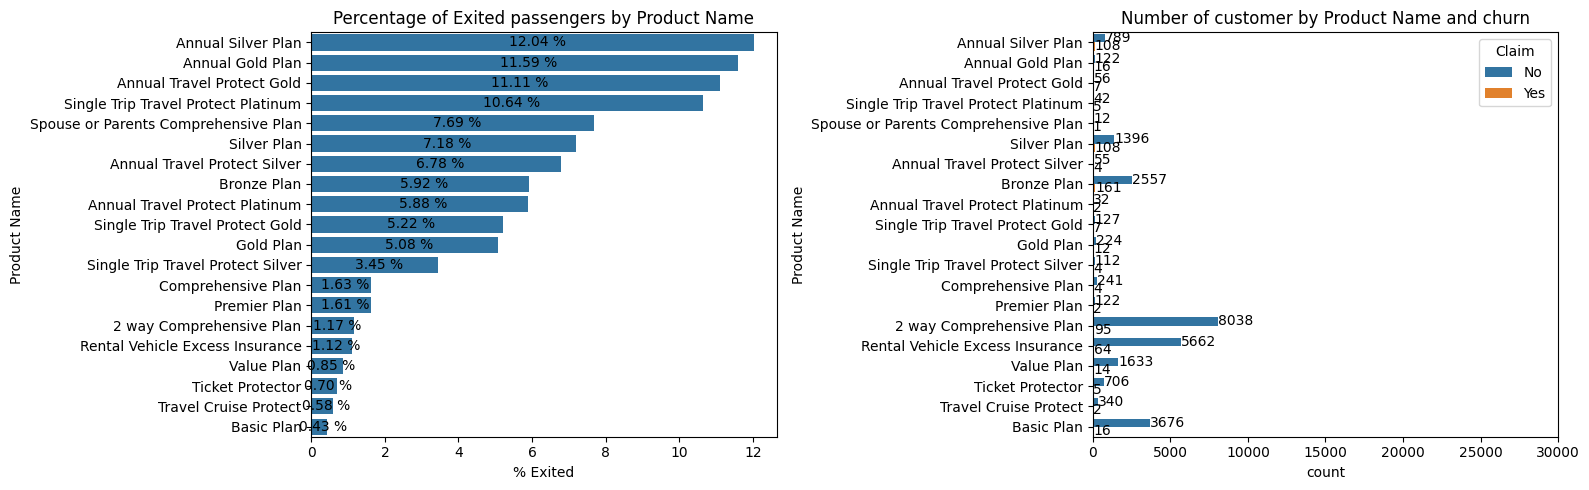

In [621]:
create_plot(df, 'Product Name', x_maks=30000)

Didapatkan bahwa tipe asuransi 'Annual Silver Plan' memiliki persentase klaim yang sangat tinggi yaitu sebesar 12,04%

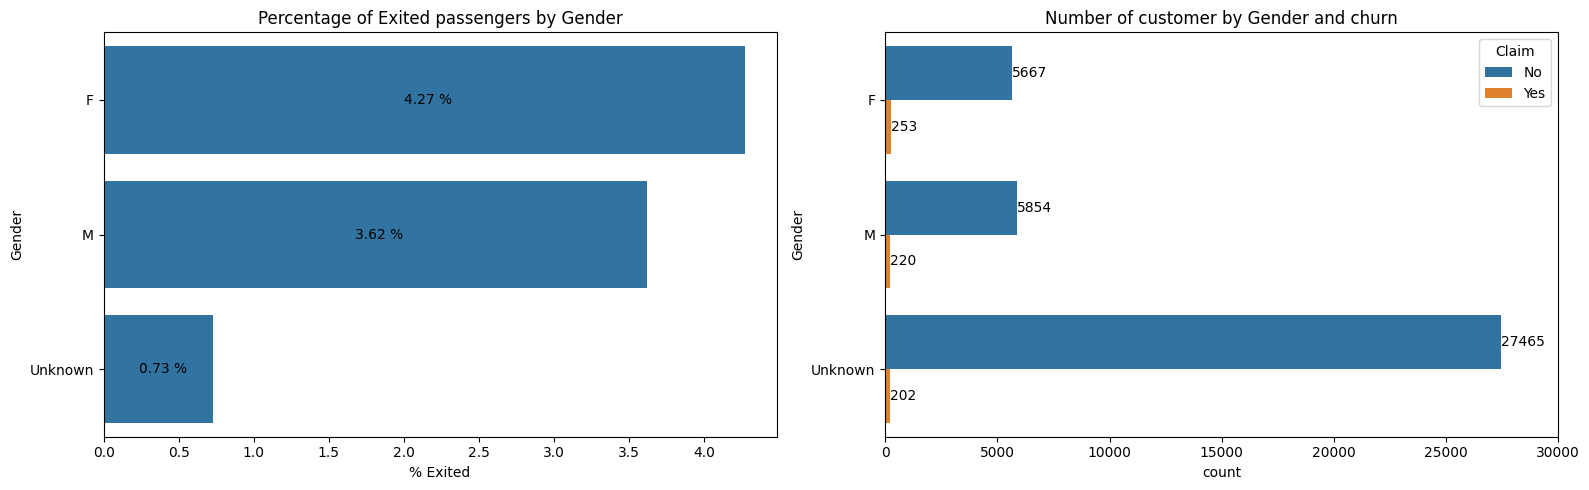

In [622]:
create_plot(df, 'Gender', x_maks=30000)

Didapatkan bahwa pihak tertanggung wanita memiliki persetase klaim yang paling tinggi sebesar 4,27% dibandingkan dengan pria dan tertanggung yang tidak diketahui gendernya.

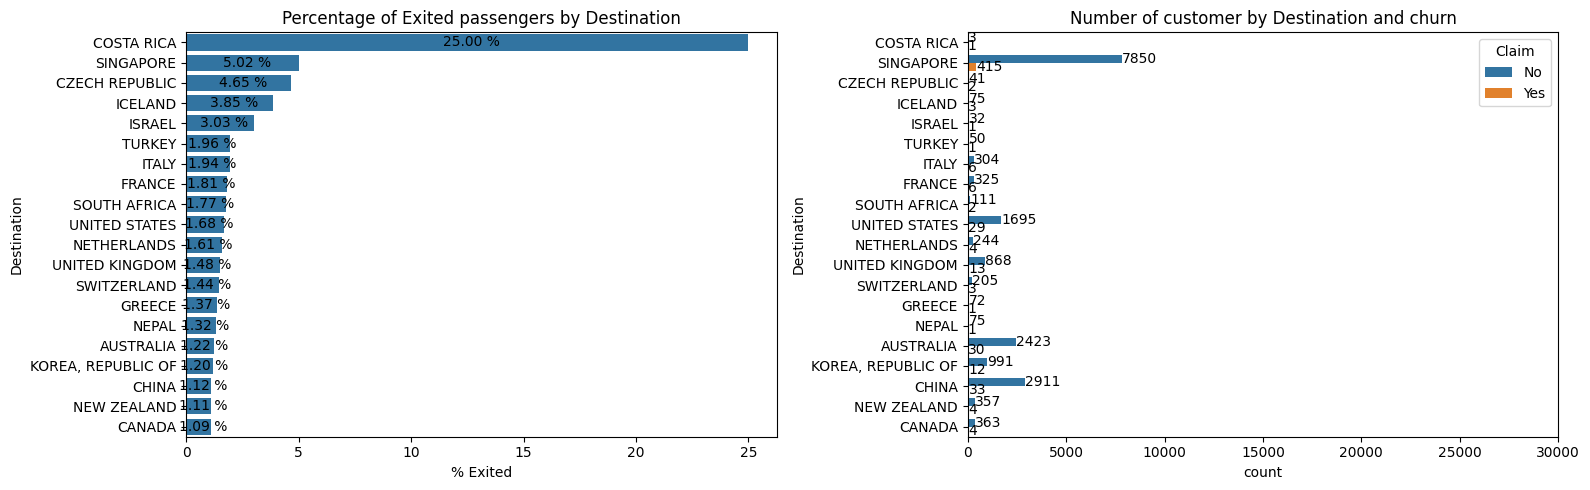

In [623]:
create_plot(df, 'Destination', x_maks=30000)

Didapatkan destinasi dengan persentase klaim tertinggi adalah costa rica yaitu sebesar 25%.

### Metric

Metrik yang digunakan dalam modeling dalam kasus asuransi perjalanan ini adalah model yang memperkecil nilai dari false negatif, hal ini dikarenakan false negatif memiliki konsekuensi keriguan yang lebih besar jika dibandingkan false positif. Untuk lebih jelasnya dibuat tabel net income sebagai berikut:

|Nilai Aktual|Nilai Prediksi|Label|Net Income|
|--|--|--|--|
|Klaim|Klaim|True Positive|Premium|
|Tidak|Tidak|True Negative|Nol|
|Klaim|Tidak|False Positve|Nol|
|Tidak|Klaim|False Negative|Premium - Benefit|

Penjelasan :
1. Orang yang diprediksi akan klaim tidak ditawarkan asuransi
2. Orang yang diprediksi tidak klaim akan ditawarkan asuransi, sehingga perusahaan akan mendapatkan premi
3. Pihak yang membeli asuransi akan mendapatkan benefit ketika klaim, sehingga perusahaan akan membayarkan benefit dimana nilai benefit jauh lebih besar dari nilai premium

Karena alasan tersebut digunakan lah metrik:
1. Recall
2. F1
3. F2

### Preprocessing

> Membuat Kolom Kode Klaim

Kode klaim berguna untuk mengubah status klaim menjadi numerik. Dimana apa bila terjadi klaim nilainya adalah 1 dan jika tidak terjadi klaim nilainya menjadi 0.

In [624]:
df['Claim Code']=df['Claim'].apply(lambda x: 0 if x=='No' else 1)

> Rare Label

Didalam pemodelam label yang persentasenya dibawah 5% dikategorikan sebagai 'other'.

In [625]:
def plot(data, column):
    """
    Plots the percentage of value counts for a categorical column with a line at the 5% threshold.
    Reverses the x-axis and omits the x-axis labels.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the categorical column to plot.
    """
    
    # Ensure the column exists in the DataFrame
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate value counts and percentages
    value_counts = data[column].value_counts()
    percentages = (value_counts / value_counts.sum()) * 100
    
    # Convert to DataFrame for plotting
    plot_data = pd.DataFrame({
        'category': percentages.index,
        'percentage': percentages.values
    }).head(20)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='percentage', y='category', data=plot_data, palette='viridis')
    
    # Add a vertical line at 5%
    plt.axvline(x=5, color='r', linestyle='--', label='5% Threshold')
    
    # Add annotations
    for index, row in plot_data.iterrows():
        plt.text(row['percentage'] + 0.5, index, f'{row["percentage"]:.1f}%', va='center')
    
    # Customize plot
    plt.ylabel('Category')
    plt.xlabel('Percentage')
    plt.title(f'Percentage of Each Category in "{column}" with 5% Threshold Line')
    plt.legend()
    
    # Reverse the x-axis
    plt.gca().invert_xaxis()
    
    # Remove x-axis labels
    plt.xticks([])
    
    # Show plot
    plt.show()

**Rare Label Kolom Agensi**

C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\552592989.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='category', data=plot_data, palette='viridis')


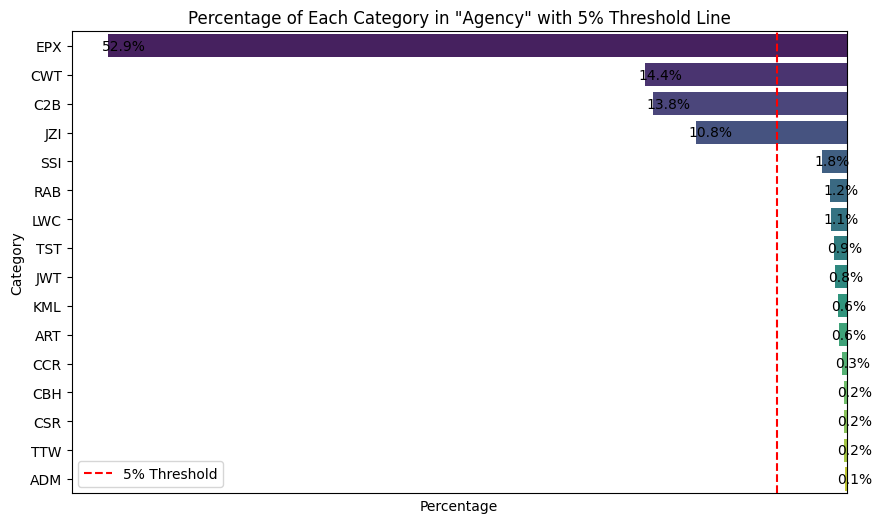

In [626]:
plot(df,'Agency')

**Rare Label Kolom Product Name**

C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\552592989.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='category', data=plot_data, palette='viridis')


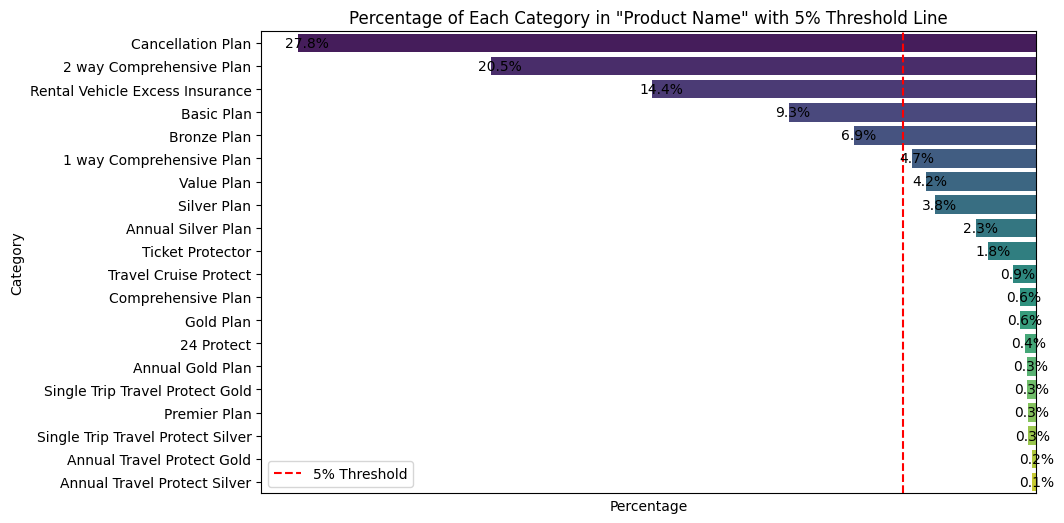

In [641]:
plot(df,'Product Name')

**Rare Label Kolom Destination**

C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\552592989.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage', y='category', data=plot_data, palette='viridis')


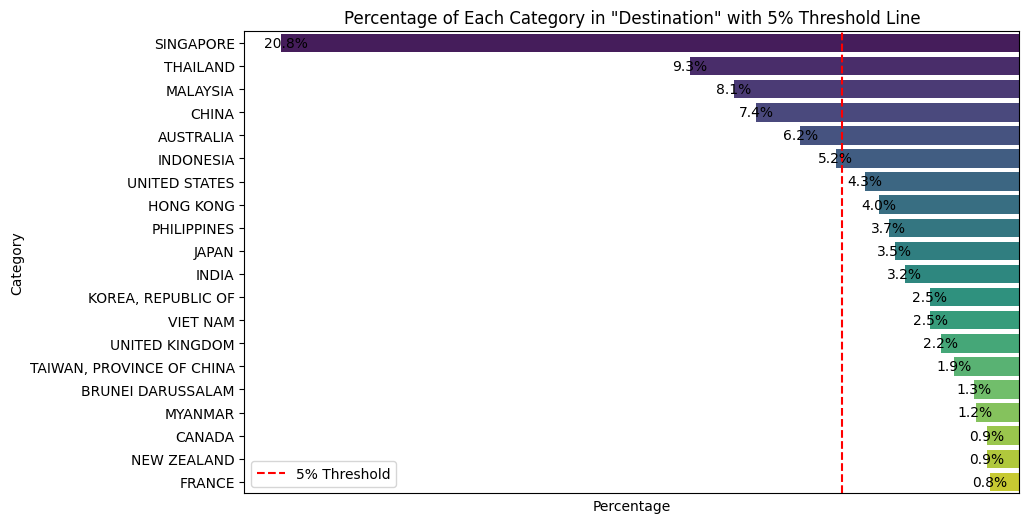

In [643]:
plot(df,'Destination')

> Feature dan Target

In [627]:
X = df.drop(columns=['Claim','Claim Code'])
y = df['Claim Code']

> Train-Test Split

In [628]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

> Handling Rare Label

In [629]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class RareLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=0.01):
        """
        Initialize the transformer with columns and a threshold.

        Parameters:
        columns (list): List of column names to apply the transformation.
        threshold (float): Percentage below which labels are considered rare.
        """
        self.columns = columns
        self.threshold = threshold

    def fit(self, X, y=None):
        """
        Learn which labels are rare based on the threshold.

        Parameters:
        X (pd.DataFrame): The data to fit on.

        Returns:
        self: Returns the instance itself.
        """
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        self.nonrare_labels_ = {}
        
        for column in self.columns:
            if column in X.columns:
                value_counts = X[column].value_counts(normalize=True)
                nonrare_labels = value_counts[value_counts >= self.threshold].index
                self.nonrare_labels_[column] = nonrare_labels
        
        return self

    def transform(self, X):
        """
        Replace rare labels with 'Other' in the specified columns.

        Parameters:
        X (pd.DataFrame): The data to transform.

        Returns:
        pd.DataFrame: The transformed data with rare labels replaced by 'Other'.
        """
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        
        X_transformed = X.copy()
        
        for column in self.columns:
            if column in X_transformed.columns:
                nonrare_labels = self.nonrare_labels_.get(column, [])
                X_transformed[column] = X_transformed[column].apply(lambda x: 'Other' if x not in nonrare_labels else x)
        
        return X_transformed

    def fit_transform(self, X, y=None):
        """
        Fit the transformer and then transform the data.

        Parameters:
        X (pd.DataFrame): The data to fit and transform.

        Returns:
        pd.DataFrame: The transformed data with rare labels replaced by 'Other'.
        """
        self.fit(X)
        return self.transform(X)


> Handling Outlier

In [630]:
class Winsorizer:
    def __init__(self, columns, lower_percentile=1, upper_percentile=99):
        """
        Initializes the Winsorizer class.
        
        Parameters:
        columns (list): List of column names to apply Winsorization.
        lower_percentile (float): Lower percentile for Winsorization (default is 1).
        upper_percentile (float): Upper percentile for Winsorization (default is 99).
        """
        self.columns = columns
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile
        self.lower_bounds = {}
        self.upper_bounds = {}
    
    def fit(self, df,y=None):
        """
        Fits the Winsorizer on the training data to calculate bounds.
        
        Parameters:
        df (pd.DataFrame): The training DataFrame to fit.
        """
        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = df[column].quantile(self.lower_percentile / 100)
            upper_bound = df[column].quantile(self.upper_percentile / 100)
            
            self.lower_bounds[column] = lower_bound
            self.upper_bounds[column] = upper_bound
    
    def transform(self, df,y=None):
        """
        Transforms the DataFrame using the fitted bounds.
        
        Parameters:
        df (pd.DataFrame): The DataFrame to transform.
        
        Returns:
        pd.DataFrame: The transformed DataFrame.
        """
        df_transformed = df.copy()
        
        for column in self.columns:
            if column not in df.columns:
                raise ValueError(f"Column '{column}' not found in DataFrame")
            
            lower_bound = self.lower_bounds.get(column)
            upper_bound = self.upper_bounds.get(column)
            
            # Apply Winsorization
            df_transformed[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        return df_transformed

    def fit_transform(self, train_df,y=None):
        """
        Fits the Winsorizer on the training data and then transforms it.
        
        Parameters:
        train_df (pd.DataFrame): The training DataFrame to fit and transform.
        
        Returns:
        pd.DataFrame: The transformed training DataFrame.
        """
        self.fit(train_df)
        return self.transform(train_df)

> Encoding

In [631]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Gender','Destination'])
], remainder='passthrough')

### Model Selection

Dalam model selection digunakan tiga metrik yaitu metrik recall, f1, dan f2. Dimana nantinya diambil 3 model terbaik berdasarkan ketiga metrik tersebut beserta jenis resampler, scaler, dan outlier handler.

In [644]:
# Define the models
f2_score = make_scorer(fbeta_score, beta=2)

rus=RandomUnderSampler(random_state=0)
ros=RandomOverSampler(random_state=0)
# Logistic Regression 
logreg = LogisticRegression(random_state=0)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# Base Models
logreg_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', logreg)
])

knn_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('modeling', knn)
])

dtree_pipeline = Pipeline([
    ('modeling', tree)
])

# Meta learner
meta_logreg = LogisticRegression(max_iter=1000)

# Voting Classifier (Hard)
voting_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)

# Voting Classifier (Soft)
voting_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

#Scaler
standar=StandardScaler()
minmax=MinMaxScaler()
robust=RobustScaler()

winsor=Winsorizer(['Duration', 'Net Sales', 'Commision (in value)', 'Age'])

> Recall Score

In [645]:
# Pilihan model
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar,minmax,robust]
resamplers = [ros,rus]
outlierhandling = [None,winsor]
score_mean = []
score_std = []
all_score = []
model_name = []
list_score=[]
resampler_name=[]
scaler_name=[]
oh_name=[]
score_accuracy=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('resampler', resampler),
                    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
                    ('outlierhandling',oh),
                    ('prepro', transformer),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = 'recall',
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = recall_score(y_test, y_pred)
                list_score.append(score)
                score_accuracy.append(accuracy_score(y_test, y_pred))
                score_mean.append(model_cv.mean())
                score_std.append(model_cv.std())
                all_score.append(model_cv.round(4))
                oh_name.append(oh.__class__.__name__)
                model_name.append(algoritma.__class__.__name__)
                resampler_name.append(resampler.__class__.__name__)
                scaler_name.append(scaler.__class__.__name__)

c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [ ]:
pd.DataFrame({
    'Model': model_name,
    'Resampler': resampler_name,
    'Scaler': scaler_name,
    'Winsorize':oh_name,
    'Accuracy Test score':score_accuracy,
    'Recall Test score':list_score,
    'Mean Recall Train Score': score_mean,
    'std': score_std,
    'CV Score' : all_score,
}).sort_values('Recall Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,Recall Test score,Mean Recall Train Score,std,CV Score
0,KNeighborsClassifier,RandomUnderSampler,RobustScaler,NoneType,0.729484,0.792593,0.716667,0.047791,"[0.7111, 0.7778, 0.6611]"
1,KNeighborsClassifier,RandomUnderSampler,RobustScaler,Winsorizer,0.730115,0.792593,0.718519,0.045662,"[0.7111, 0.7778, 0.6667]"
2,GradientBoostingClassifier,RandomUnderSampler,MinMaxScaler,Winsorizer,0.746880,0.785185,0.690741,0.034645,"[0.7, 0.7278, 0.6444]"
3,GradientBoostingClassifier,RandomUnderSampler,StandardScaler,Winsorizer,0.748393,0.785185,0.692593,0.036665,"[0.7, 0.7333, 0.6444]"
4,GradientBoostingClassifier,RandomUnderSampler,StandardScaler,NoneType,0.737426,0.785185,0.709259,0.036665,"[0.7167, 0.75, 0.6611]"
5,KNeighborsClassifier,RandomUnderSampler,MinMaxScaler,Winsorizer,0.721417,0.785185,0.718519,0.041159,"[0.7111, 0.7722, 0.6722]"
6,RandomForestClassifier,RandomUnderSampler,MinMaxScaler,Winsorizer,0.731375,0.785185,0.701852,0.027716,"[0.7389, 0.6944, 0.6722]"
7,GradientBoostingClassifier,RandomUnderSampler,NoneType,Winsorizer,0.747889,0.785185,0.690741,0.034645,"[0.7, 0.7278, 0.6444]"
8,GradientBoostingClassifier,RandomUnderSampler,NoneType,NoneType,0.737552,0.785185,0.709259,0.036665,"[0.7167, 0.75, 0.6611]"
9,RandomForestClassifier,RandomUnderSampler,NoneType,Winsorizer,0.731249,0.785185,0.707407,0.032182,"[0.75, 0.7, 0.6722]"


Didapatkan bahwa model dengan nilai recall tertinggi adalah KNeighborsClassifier dengan random under sampler resampler, robust scaler, dan tanpa winsorizer.

> F1 Score

In [646]:
# Pilihan model
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar,minmax,robust]
resamplers = [ros,rus]
outlierhandling = [None,winsor]
score_mean = []
score_std = []
all_score = []
model_name = []
list_score=[]
resampler_name=[]
scaler_name=[]
oh_name=[]
score_accuracy=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('resampler', resampler),
                    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
                    ('outlierhandling',oh),
                    ('prepro', transformer),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = 'f1',
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = f1_score(y_test, y_pred)
                list_score.append(score)
                score_accuracy.append(accuracy_score(y_test, y_pred))
                score_mean.append(model_cv.mean())
                score_std.append(model_cv.std())
                all_score.append(model_cv.round(4))
                oh_name.append(oh.__class__.__name__)
                model_name.append(algoritma.__class__.__name__)
                resampler_name.append(resampler.__class__.__name__)
                scaler_name.append(scaler.__class__.__name__)

c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [647]:
pd.DataFrame({
    'Model': model_name,
    'Resampler': resampler_name,
    'Scaler': scaler_name,
    'Winsorize':oh_name,
    'Accuracy Test score':score_accuracy,
    'F1 Test score':list_score,
    'Mean F1 Train Score': score_mean,
    'std': score_std,
    'CV Score' : all_score,
}).sort_values('F1 Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,F1 Test score,Mean F1 Train Score,std,CV Score
0,XGBClassifier,RandomOverSampler,NoneType,Winsorizer,0.916047,0.121372,0.090333,0.010796,"[0.0759, 0.0931, 0.102]"
1,XGBClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.916047,0.121372,0.090333,0.010796,"[0.0759, 0.0931, 0.102]"
2,XGBClassifier,RandomOverSampler,RobustScaler,Winsorizer,0.916047,0.121372,0.090333,0.010796,"[0.0759, 0.0931, 0.102]"
3,XGBClassifier,RandomOverSampler,MinMaxScaler,Winsorizer,0.916047,0.121372,0.090333,0.010796,"[0.0759, 0.0931, 0.102]"
4,XGBClassifier,RandomOverSampler,MinMaxScaler,NoneType,0.909492,0.120098,0.089945,0.011900,"[0.0751, 0.0904, 0.1043]"
5,XGBClassifier,RandomOverSampler,RobustScaler,NoneType,0.909492,0.120098,0.089945,0.011900,"[0.0751, 0.0904, 0.1043]"
6,XGBClassifier,RandomOverSampler,NoneType,NoneType,0.909492,0.120098,0.089945,0.011900,"[0.0751, 0.0904, 0.1043]"
7,XGBClassifier,RandomOverSampler,StandardScaler,NoneType,0.909492,0.120098,0.089945,0.011900,"[0.0751, 0.0904, 0.1043]"
8,VotingClassifier,RandomOverSampler,NoneType,NoneType,0.954872,0.118227,0.091160,0.014133,"[0.1063, 0.0949, 0.0723]"
9,VotingClassifier,RandomOverSampler,RobustScaler,NoneType,0.954872,0.118227,0.089666,0.012773,"[0.1018, 0.0952, 0.072]"


Didapatkan bahwa model dengan nilai f1 tertinggi adalah XGBClassifier dengan random over sampler resampler, tanpa scaler, dan dengan winsorize.

> F2 Score

In [648]:
# Pilihan model
models = [logreg, knn, tree, voting_hard, voting_soft, stacking, rf, adaboost, gradboost, xgboost]
scalers = [None,standar,minmax,robust]
resamplers = [ros,rus]
outlierhandling = [None,winsor]
score_mean = []
score_std = []
all_score = []
model_name = []
list_score=[]
resampler_name=[]
scaler_name=[]
oh_name=[]
score_accuracy=[]
# Mencari model terbaik berdasarkan rerata score score terkecil dan std terkecil
for oh in outlierhandling:
    for scaler in scalers:
        for resampler in resamplers:
            for algoritma in models:

                model_pipe = Pipeline([
                    ('resampler', resampler),
                    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
                    ('outlierhandling',oh),
                    ('prepro', transformer),
                    ('scaler', scaler),
                    ('model', algoritma)
                ])

                skfold = StratifiedKFold(n_splits = 3)

                model_cv = cross_val_score(
                    model_pipe,                 # model yang sudah dimasukkan ke dalam pipeline
                    X_train,                    # data sebelum di preprocessing
                    y_train, 
                    cv = skfold, 
                    scoring = f2_score,
                    error_score='raise'
                    )
                
                model_pipe.fit(X_train, y_train)
                y_pred = model_pipe.predict(X_test)
                score = fbeta_score(y_test, y_pred,beta=2)
                list_score.append(score)
                score_accuracy.append(accuracy_score(y_test, y_pred))
                score_mean.append(model_cv.mean())
                score_std.append(model_cv.std())
                all_score.append(model_cv.round(4))
                oh_name.append(oh.__class__.__name__)
                model_name.append(algoritma.__class__.__name__)
                resampler_name.append(resampler.__class__.__name__)
                scaler_name.append(scaler.__class__.__name__)

c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [649]:
pd.DataFrame({
    'Model': model_name,
    'Resampler': resampler_name,
    'Scaler': scaler_name,
    'Winsorize':oh_name,
    'Accuracy Test score':score_accuracy,
    'F2 Test score':list_score,
    'Mean F2 Train Score': score_mean,
    'std': score_std,
    'CV Score' : all_score,
}).sort_values('F2 Test score', ascending=False).head(10).reset_index(drop=True)

,Model,Resampler,Scaler,Winsorize,Accuracy Test score,F2 Test score,Mean F2 Train Score,std,CV Score
0,GradientBoostingClassifier,RandomOverSampler,RobustScaler,Winsorizer,0.812933,0.230658,0.214585,0.009891,"[0.2275, 0.2035, 0.2127]"
1,GradientBoostingClassifier,RandomOverSampler,MinMaxScaler,Winsorizer,0.812933,0.230658,0.214614,0.009930,"[0.2276, 0.2035, 0.2127]"
2,GradientBoostingClassifier,RandomOverSampler,StandardScaler,Winsorizer,0.812933,0.230658,0.214614,0.009930,"[0.2276, 0.2035, 0.2127]"
3,GradientBoostingClassifier,RandomOverSampler,NoneType,Winsorizer,0.812933,0.230658,0.214614,0.009930,"[0.2276, 0.2035, 0.2127]"
4,GradientBoostingClassifier,RandomOverSampler,StandardScaler,NoneType,0.815202,0.228266,0.217784,0.009286,"[0.2271, 0.2051, 0.2211]"
5,GradientBoostingClassifier,RandomOverSampler,RobustScaler,NoneType,0.815202,0.228266,0.217755,0.009256,"[0.227, 0.2051, 0.2211]"
6,GradientBoostingClassifier,RandomOverSampler,MinMaxScaler,NoneType,0.815202,0.228266,0.217804,0.009189,"[0.227, 0.2053, 0.2211]"
7,GradientBoostingClassifier,RandomOverSampler,NoneType,NoneType,0.815202,0.228266,0.217837,0.009281,"[0.2272, 0.2052, 0.2211]"
8,LogisticRegression,RandomOverSampler,NoneType,NoneType,0.807135,0.227806,0.216150,0.008952,"[0.2145, 0.2061, 0.2278]"
9,LogisticRegression,RandomOverSampler,MinMaxScaler,NoneType,0.803731,0.227062,0.214411,0.014023,"[0.2187, 0.1955, 0.229]"


Didapatkan bahwa model dengan nilai f2 tertinggi adalah GradientBoostingClassifier dengan random over sampler resampler, robust scaler, dan dengan winsorize.

### Tuning

Dalam proses tuning, parameter yang terdapat didalam ketiga model di tuning sehingga mendapatkan nilai metrik yang terbaik.

> Recal

In [650]:
# Define the parameter grid
model_pipe = Pipeline([
    ('resampler', rus),
    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
    ('outlierhandling',None),
    ('prepro', transformer),
    ('scaler', robust),
    ('model', KNeighborsClassifier())
])

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],         # Number of neighbors to use by default for kneighbors queries.
    'model__weights': ['uniform', 'distance'],      # Weight function used in prediction.
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors.
    'model__leaf_size': [20, 30, 40, 50],           # Leaf size passed to BallTree or KDTree.
    'model__p': [1, 2],                             # Power parameter for the Minkowski metric (1 is equivalent to the Manhattan distance and 2 is equivalent to the Euclidean distance).
}
# Initialize GridSearchCV
grid_search_recall = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring='recall', 
                           n_jobs=-1)
grid_search_recall.fit(X_train, y_train)
print(f'Score pada train set: {grid_search_recall.best_score_:.5f}')
print(f'Best parameter: {grid_search_recall.best_params_}')
final_model_recall = grid_search_recall.best_estimator_

# fitting
final_model_recall.fit(X_train, y_train)

Score pada train set: 0.72407
Best parameter: {'model__algorithm': 'auto', 'model__leaf_size': 20, 'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'uniform'}


c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('resampler', RandomUnderSampler(random_state=0)),
                ('rarelabel',
                 RareLabelTransformer(columns=['Agency', 'Product Name',
                                               'Destination'],
                                      threshold=0.05)),
                ('outlierhandling', None),
                ('prepro',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Product Name', 'Gender',
                                                   'Destination'])])),
                ('scaler', RobustScaler()),
                ('model', KNeighborsClassifier(leaf_size=20, p=1))])

In [651]:
y_pred = final_model_recall.predict(X_test)
print(f'Score pada train set: {grid_search_recall.best_score_:.5f}')
print(f'Score pada test set: {recall_score(y_test, y_pred):.5f}')
print(f'Best parameter: {grid_search_recall.best_params_}')

Score pada train set: 0.72407
Score pada test set: 0.77037
Best parameter: {'model__algorithm': 'auto', 'model__leaf_size': 20, 'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'uniform'}


|  |Recall Test Score|Recall Train Score|
|--|--|--|
|Before Tuning|0.79259|0.71667|
|After Tuning|0.77037|0.72407|

> F1

In [653]:
# Define the parameter grid
model_pipe = Pipeline([
    ('resampler', ros),
    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
    ('outlierhandling',winsor),
    ('prepro', transformer),
    ('scaler', None),
    ('model', XGBClassifier(random_state=0))
])

param_grid = {
    'model__n_estimators': [50, 100, 200],          # Number of boosted trees to fit.
    'model__max_depth': [4, 6, 8],              # Maximum depth of a tree.
    'model__learning_rate': [0.1,0.2, 0.3,0.4],  # Step size shrinkage used in update to prevent overfitting.
    'model__subsample': [0.8, 1.0],            # Subsample ratio of the training instance.
    'model__colsample_bytree': [0.8, 1.0],     # Subsample ratio of columns when constructing each tree.
}
# Initialize GridSearchCV
grid_search_f1 = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring='f1', 
                           n_jobs=-1)
grid_search_f1.fit(X_train, y_train)
print(f'Score pada train set: {grid_search_f1.best_score_:.5f}')
print(f'Best parameter: {grid_search_f1.best_params_}')
final_model_f1 = grid_search_f1.best_estimator_

# fitting
final_model_f1.fit(X_train, y_train)

c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
151 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kifla\AppDa

Score pada train set: 0.11193
Best parameter: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1.0}


c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('resampler', RandomOverSampler(random_state=0)),
                ('rarelabel',
                 RareLabelTransformer(columns=['Agency', 'Product Name',
                                               'Destination'],
                                      threshold=0.05)),
                ('outlierhandling',
                 <__main__.Winsorizer object at 0x000001A829D1C950>),
                ('prepro',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency', 'Agenc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [654]:
y_pred = final_model_f1.predict(X_test)
print(f'Score pada train set: {grid_search_f1.best_score_:.5f}')
print(f'Score pada test set: {f1_score(y_test, y_pred):.5f}')
print(f'Best parameter: {grid_search_f1.best_params_}')

Score pada train set: 0.11193
Score pada test set: 0.11174
Best parameter: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1.0}


|  |Recall Test Score|Recall Train Score|
|--|--|--|
|Before Tuning|0.12137|0.09033|
|After Tuning|0.11174|0.11193|

> F2

In [656]:
# Define the parameter grid
model_pipe = Pipeline([
    ('resampler', ros),
    ('rarelabel', RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])),
    ('outlierhandling',winsor),
    ('prepro', transformer),
    ('scaler', robust),
    ('model', GradientBoostingClassifier(random_state=0))
])

param_grid = {

    'model__max_depth': [3, 5, 7,9],                  # Maximum depth of the individual regression estimators.
    'model__min_samples_split': [2, 7, 12],         # Minimum number of samples required to split an internal node.
    'model__min_samples_leaf': [1, 3, 5],           # Minimum number of samples required to be at a leaf node.
}
# Initialize GridSearchCV
grid_search_f2 = GridSearchCV(estimator=model_pipe, 
                           param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits = 3), 
                           scoring=f2_score, 
                           n_jobs=-1)
grid_search_f2.fit(X_train, y_train)

final_model_f2 = grid_search_f2.best_estimator_

# fitting
final_model_f2.fit(X_train, y_train)

# predict


c:\Users\kifla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('resampler', RandomOverSampler(random_state=0)),
                ('rarelabel',
                 RareLabelTransformer(columns=['Agency', 'Product Name',
                                               'Destination'],
                                      threshold=0.05)),
                ('outlierhandling',
                 <__main__.Winsorizer object at 0x000001A82077CEC0>),
                ('prepro',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Product Name', 'Gender',
                                                   'Destination'])])),
                ('scaler', RobustScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=5,
                                            random_state=0))])

In [657]:
y_pred = final_model_f2.predict(X_test)
print(f'Score pada train set: {grid_search_f2.best_score_:.5f}')
print(f'Score pada test set: {fbeta_score(y_test, y_pred,beta=2):.5f}')
print(f'Best parameter: {grid_search_f2.best_params_}')

Score pada train set: 0.21780
Score pada test set: 0.23681
Best parameter: {'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}


|  |Recall Test Score|Recall Train Score|
|--|--|--|
|Before Tuning|0.23065|0.21458|
|After Tuning|0.23681|0.21780|

### Threshold Adjustment

Setelah didapatkan 3 model terbaik berdasarkan 3 metrik yang berbeda, dicarilah threshold terbaik berdasarkan net income yang tertinggi, dimana apabila probabilitas suatu orang melakukan klaim lebih besar dari Threshold maka orang itu prediksi akan klaim dan tidak akan mendapatkan penawaran asuransi. Net income dari suatu perusahaan asuransi adalah:

$ \text{Net Income} = \text{Premiums Earned} + \text{Investment Income} - \text{Benefits} - \text{Operating Expenses} - \text{Reinsurance Costs} - \text{Taxes} $

Namun dalam perhitungan ini nilai invesment, Operating Expenses, Reinsurance Costs, dan Taxes diabaikan sehingga menjadi:

$ \text{Net Income} = \text{Premiums Earned} - \text{Benefits}$

Pada perhitungan total net income diasumsikan bahwa:
1. Orang yang diprediksi akan klaim tidak akan ditawarkan asuransi
2. Orang yang membeli asuransi membayar premi
2. Nilai premium polis asuransi perjalanan adalah $ \text{Premi} = \text{300.000} + \text{30.000} * \text{Durasi}$
3. Benefit yang diterima oleh pihak tertanggung apabila terjadi klaim adalah 75.000.000

In [658]:
import copy
tabel_data_test=copy.deepcopy(X_test)

tabel_data_test['prob_recall']=final_model_recall.predict_proba(X_test)[:,1]
tabel_data_test['prob_f1']=final_model_f1.predict_proba(X_test)[:,1]
tabel_data_test['prob_f2']=final_model_f2.predict_proba(X_test)[:,1]

tabel_data_test['pred_recall']=final_model_recall.predict(X_test)
tabel_data_test['pred_f1']=final_model_f1.predict(X_test)
tabel_data_test['pred_f2']=final_model_f2.predict(X_test)
tabel_data_test['Claim']=y_test


In [682]:
def netincome(x):
    return x['acc']*(x['Duration']*0.03+0.3-75*x['Claim'])
def best_treshold(df,prob):
    data=copy.deepcopy(df)
    list_treshold=[]
    list_netincome=[]
    for i in [round(i * 0.01, 2) for i in range(1, 100)]:
        list_treshold.append(i)
        data['acc']=data[prob].apply(lambda x: 1 if x<i else 0)
        data['Net Income']=data.apply(netincome,axis=1)
        list_netincome.append(data['Net Income'].sum())
    return pd.DataFrame({'treshold': list_treshold,'Net Income': list_netincome})

In [683]:
r=best_treshold(tabel_data_test,'prob_recall')
f1=best_treshold(tabel_data_test,'prob_f1')
f2=best_treshold(tabel_data_test,'prob_f2')

In [684]:
def plot_multiple_lines(datasets, titles, x_column, y_column):
    """
    Plots multiple datasets on a single line chart.

    Parameters:
    - datasets: List of DataFrames or dictionaries with the data.
    - titles: List of labels for each dataset to be used in the legend.
    - x_column: The column name for the X-axis values.
    - y_column: The column name for the Y-axis values.

    Example Usage:
    plot_multiple_lines(
        datasets=[df1, df2, df3],
        titles=['Dataset 1', 'Dataset 2', 'Dataset 3'],
        x_column='X',
        y_column='Y'
    )
    """
    # Check if inputs are valid
    if len(datasets) != len(titles):
        raise ValueError("The number of datasets must match the number of titles.")
    
    # Plot each dataset
    for i, data in enumerate(datasets):
        plt.plot(data[x_column], data[y_column], label=titles[i], marker=None)

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Net Income vs. Threshold')

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

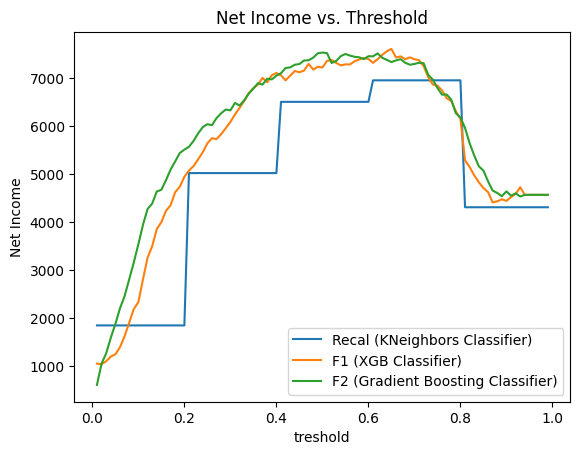

In [685]:
plot_multiple_lines([r,f1,f2],['Recal (KNeighbors Classifier)','F1 (XGB Classifier)','F2 (Gradient Boosting Classifier)'],y_column='Net Income',x_column='treshold')

In [693]:
net=0.3*len(tabel_data_test)+tabel_data_test['Duration'].sum()*0.03-tabel_data_test['Claim'].sum()*75
data = {
    'Recal (KNeighbors Classifier)': {'Net Income': float(r[r['treshold']==0.5]['Net Income']), 'Net Income (best threshold)': r['Net Income'].max(), 'best threshold': r.sort_values('Net Income',ascending=False).iloc[0,0]},
    'F1 (XGB Classifier)': {'Net Income': float(r[f1['treshold']==0.5]['Net Income'].values), 'Net Income (best threshold)': f1['Net Income'].max(), 'best threshold': f1.sort_values('Net Income',ascending=False).iloc[0,0]},
    'F2 (Gradient Boosting Classifier)': {'Net Income': float(f2[r['treshold']==0.5]['Net Income'].values), 'Net Income (best threshold)': f2['Net Income'].max(), 'best threshold': f2.sort_values('Net Income',ascending=False).iloc[0,0]},
    'None': {'Net Income': net, 'Net Income (best threshold)': '-', 'best threshold': '-'},
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')
df

C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\2155428260.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Recal (KNeighbors Classifier)': {'Net Income': float(r[r['treshold']==0.5]['Net Income']), 'Net Income (best threshold)': r['Net Income'].max(), 'best threshold': r.sort_values('Net Income',ascending=False).iloc[0,0]},
C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\2155428260.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'F1 (XGB Classifier)': {'Net Income': float(r[f1['treshold']==0.5]['Net Income'].values), 'Net Income (best threshold)': f1['Net Income'].max(), 'best threshold': f1.sort_values('Net Income',ascending=False).iloc[0,0]},
C:\Users\kifla\AppData\Local\Temp\ipykernel_34708\21554282

,Net Income,Net Income (best threshold),best threshold
Recal (KNeighbors Classifier),6505.98,6954.72,0.78
F1 (XGB Classifier),6505.98,7609.44,0.65
F2 (Gradient Boosting Classifier),7534.08,7534.08,0.5
None,4567.05,-,-


Didapatkan bahwa besarnya net income tertinggi terjadi ketika kita memfilter orang yang berkemungkinan klaim dengan model XGB Classifier dengan nilai threshold 0.65. **Sehingga diambillah model XGB Classifier dengan threshold 65% sebagai model terbaik**.

### Best Model Evaluation

**Best Model**

Didapatkan Bahwa Model terbaik adalah model Gradient Boosting Classifier dengan detail sebagai berikut:

|Title|Method |
|--|--|
|Metric|F1|
|Resampler|RandomOverSampler|
|Rare Lable Handler|RareLabelTransformer(threshold=0.05,columns=['Agency','Product Name','Destination'])|
|Outlier Handler|Winsorizer|
|Encoding|OneHotEncoder|
|Scaler|None|
|Model|XGBClassifier('model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 1.0)|
|Threshold|0.65|

**Learning Curve**

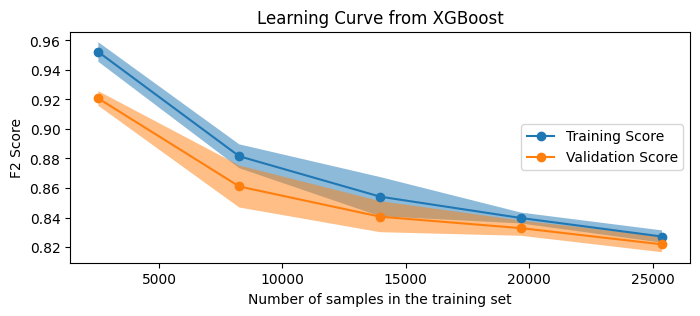

In [694]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model_f1, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from XGBoost')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

In [733]:
transformer = final_model_f1.named_steps['prepro']
feature_names = transformer.get_feature_names_out()
df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : final_model_f1['model'].feature_importances_
}).sort_values(by='importances', ascending=False)

In [737]:
def plot_barchart(df, x_column, y_column):
    """
    Create a bar chart from the given DataFrame with labels on each bar.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    x_column (str): The name of the column to use for the x-axis.
    y_column (str): The name of the column to use for the y-axis.

    Returns:
    None
    """
    # Extract data for plotting
    x_data = df[x_column]
    y_data = df[y_column]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_data, y_data, color='skyblue')
    
    # Set labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Bar Chart of {y_column} vs {x_column}')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')
    
    # Add labels on each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent label cut-off
    plt.show()

# Example usage:

**Feature Importances**

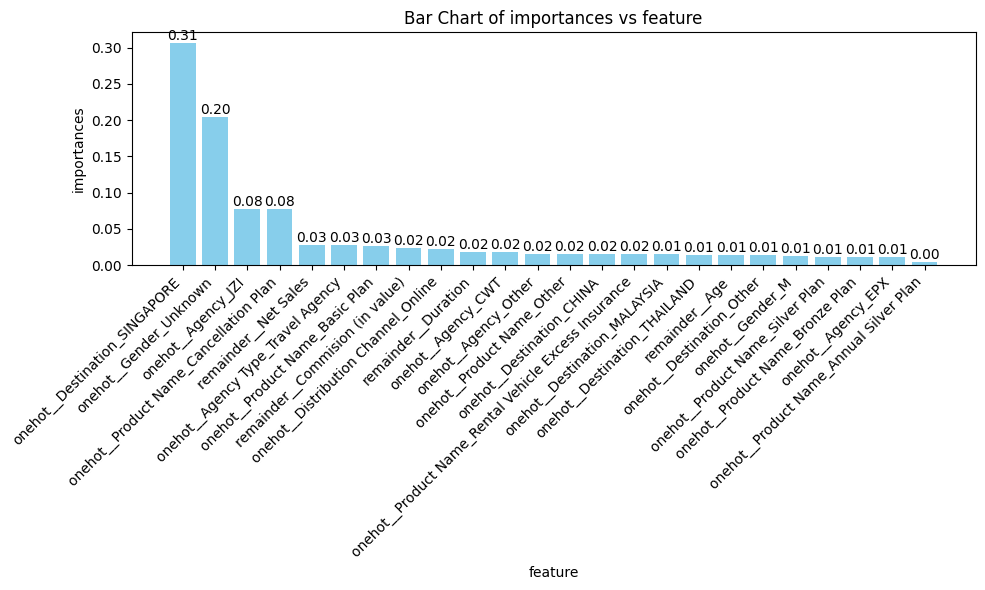

In [738]:
plot_barchart(df_coef, 'feature', 'importances')

Didapatkan bahwa feature ata variabel yang paling signifikan dalam membedakan orang yang akan klaim atau tidak adalah Destinasi Singapura dan Gender Unknown.

**Precision VS Recall**

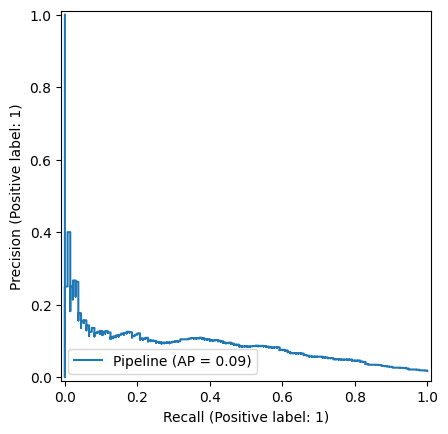

In [751]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, final_model_f1.predict_proba(X_test)[:,1])
PrecisionRecallDisplay.from_estimator(final_model_f1, X_test, y_test)
plt.show()

**Confusion Matrix (threshold = 0.5)**

In [791]:
from sklearn.metrics import precision_recall_fscore_support
def calculate_metrics(y_actual, y_pred):
    # Compute precision, recall, and F-score for positive and negative classes
    precision, recall, _, _ = precision_recall_fscore_support(y_actual, y_pred, average=None, zero_division=0)

    # Assuming binary classification: positive class = 1, negative class = 0
    # precision[0] and recall[0] are for class 0 (negative class)
    # precision[1] and recall[1] are for class 1 (positive class)

    # Create a dictionary for the DataFrame
    metrics = {
        'Positive Recall': [recall[1]],
        'Negative Recall': [recall[0]],
        'Positive Precision': [precision[1]],
        'Negative Precision': [precision[0]]
    }

    # Create DataFrame
    df_metrics = pd.DataFrame(metrics)

    return df_metrics

<Axes: >

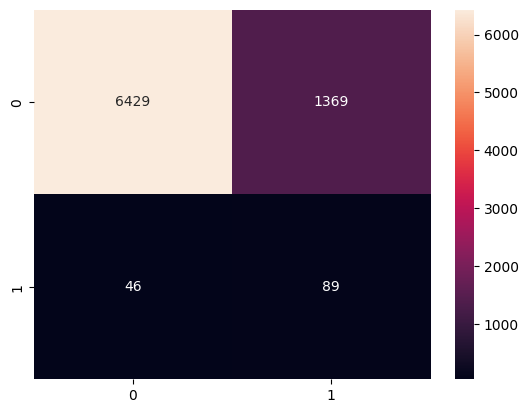

In [796]:
y_pred=final_model_f1.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [797]:
calculate_metrics(y_test, y_pred)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.659259,0.824442,0.061043,0.992896


**Confusion Matrix (threshold = 0.65)**

<Axes: >

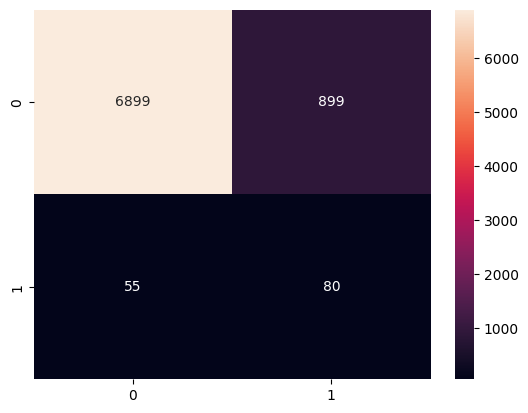

In [798]:
y_prob=final_model_f1.predict_proba(X_test)[:,1]
y_pred_thr=[1 if number >= 0.65 else 0 for number in y_prob]
confusion_matrix(y_test, y_pred_thr)
sns.heatmap(confusion_matrix(y_test, y_pred_thr), annot=True, fmt='g')

In [799]:
calculate_metrics(y_test, y_pred_thr)

,Positive Recall,Negative Recall,Positive Precision,Negative Precision
0,0.592593,0.884714,0.081716,0.992091


**Net Income**

Berikut merupakan nilai net income per polis, sebelum dan setelah dilakukannya filtering dengan menolak orang yang memiliki probabilitas klaim diatas 65% berdasarkan model XGB Classifier.

In [787]:
net=0.3*len(tabel_data_test)+tabel_data_test['Duration'].sum()*0.03-tabel_data_test['Claim'].sum()*75

print(f'Net income sebelum filter : {net/1000:.3f} milyar rupiah (dari {len(tabel_data_test)} polis)')
print(f'Net income setelah filter : {f1['Net Income'].max()/1000:.3f} milyar rupiah (dari {len(tabel_data_test)} polis)')


print(f'Net income per polis asuransi sebelum filter : {net/len(tabel_data_test)*1000:.3f} ribu rupiah')
print(f'Net income per polis asuransi setelah filter : {f1['Net Income'].max()/len(tabel_data_test)*1000:.3f} ribu rupiah')

Net income sebelum filter : 4.567 milyar rupiah (dari 7933 polis)
Net income setelah filter : 7.609 milyar rupiah (dari 7933 polis)
Net income per polis asuransi sebelum filter : 575.703 ribu rupiah
Net income per polis asuransi setelah filter : 959.213 ribu rupiah


Didapatkan bahwa apabila perusahaan asuransi perjalanan memfilter orang dengan probabilitas klaim diatas 65% dengan model XGB classifier, terjadi peningkatan net income sebesar 66,61% dari 4.567 milyar menjadi 7.609 milyar rupiah dengan net income per polis sebesar 959.213 ribu rupiah.

### Kesimpulan dan Saran

**Kesimpulan**

Model terbaik berdasarkan besarnya net income adalah model XGB Classifier dengan menggunakan random oversampler, winsorizer, dan tanpa scaler. Pada pemodelan rare label dikelompokan menjadi satu grup yang nantinya setiap variabel kategori di encode dengan one hot encoder. Pada model ini didapatkan threshold terbaik sebesar 65% dalam memaksimalkan net income. Apabila perusahaan asuransi perjalanan memfilter orang dengan probabilitas klaim diatas 65%, terjadi **peningkatan net income sebesar 66,61%** dari 4.567 milyar menjadi 7.609 milyar rupiah dengan net income per polis sebesar 959.213 ribu rupiah.

**Saran**

Perusahaan asuransi dapat memfilter orang dengan kemungkinan klaim tinggi untuk memaksimalkan income.

Perusahaan asuransi dapat menyesuaikan harga sesuai dengan destinasi, agency, dan profil dari suatu individu, berdasarkan model yang didapat faktor yang paling baik dalam membedakan orang yang akan klaim dan tidak adalah apakah destinasinya Singapura atau tidak, dan apakah gendernya unknown atau tidak.

In [801]:
import pickle

# Define final model
final_model = final_model_f1

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('Final Model.sav', 'wb'))